## INTENTION OF THIS WORKBOOK
This next pass will calculate the tiers of the AdAge US Top 900 advertising based on this criteria:
* Supernovas: 2 Billion +
* Mid-market (Global): 500 Million - 2 Billion 
* Burgeoning: 100 Million - 500 Million 
* Contenders: 25 Million - 100 Million

In [1]:
import pandas as pd
import re
%matplotlib inline

In [2]:
# create dataframes for the six years we will be looking at
# by importing the 2010 thru 2015 AdAge data
raw15='/Users/xavier/Documents/src/dataviz/AgencyRevenueModels/adage-data/adage-900_2015.csv'
raw14='/Users/xavier/Documents/src/dataviz/AgencyRevenueModels/adage-data/adage-900_2014.csv'
raw13='/Users/xavier/Documents/src/dataviz/AgencyRevenueModels/adage-data/adage-900_2013.csv'
raw12='/Users/xavier/Documents/src/dataviz/AgencyRevenueModels/adage-data/adage-900_2012.csv'
raw11='/Users/xavier/Documents/src/dataviz/AgencyRevenueModels/adage-data/adage-900_2011.csv'
raw10='/Users/xavier/Documents/src/dataviz/AgencyRevenueModels/adage-data/adage-900_2010.csv'
adage15 = pd.read_csv(raw15)
adage15.name = 'adage2015'
adage14 = pd.read_csv(raw14)
adage14.name = 'adage2014'
adage13 = pd.read_csv(raw13)
adage13.name = 'adage2013'
adage12 = pd.read_csv(raw12)
adage12.name = 'adage2012'
adage11 = pd.read_csv(raw11)
adage11.name = 'adage2011'
adage10 = pd.read_csv(raw10)
adage10.name = 'adage2010'

In [3]:
fiveyear = [adage15,adage14,adage13,adage12,adage11,adage10]

In [4]:
# A function to RETURN two variables from AGENCY-COMPANY column
def indySubstituteSimple(x):
    parent = re.compile("\[(.*)\]")
    owned = re.compile("(.+?)\[(.*)\]")
    p = parent.search(x)
    if p:
        o = owned.search(x)
        return o.group(1),o.group(2)
    else:
        return x, "Independent"

In [5]:
# Create two new Columns that take the two outputs of the function
# Remove the bigger agency parent, e.g. 'Omnicom (child of BBDO)'
# Strip any trailing whitespaces in the names
# Transform revenue to the literal number, not 'In thousands'
# Remove the * asterisk after the agency name
def defineTiers(z):
    z['AGENCY-NAME'], z['AGENCY-OWNER'] = zip(*z['AGENCY-COMPANY'].map(indySubstituteSimple))
    z.loc[:, 'AGENCY-OWNER'] = z['AGENCY-OWNER'].apply(lambda x: re.sub(r'\([^)]*\)', '', x))
    z.loc[:, 'AGENCY-OWNER'] = z['AGENCY-OWNER'].apply(lambda x: re.sub(r'\s+$', '', x))
    z.iloc[:,2] = z.iloc[:,2].apply(lambda x: x*1000)
    z.iloc[:,4] = z.iloc[:,4].apply(lambda x: re.sub(r'\*', '', x))
#    z['AGENCY-TIER'] = z['AGENCY-OWNER'].apply(typer)

In [6]:
for i in range (0,len(fiveyear),1):
    defineTiers(fiveyear[i])

In [7]:
count_2010 = adage10.groupby('AGENCY-OWNER').size().to_frame(name = adage10.name + '_count').reset_index()
count_2010

,AGENCY-OWNER,adage2010_count
0,Ad Venture Interactive,1
1,Aegis Group,5
2,Alliance Data Systems Corp.,1
3,Alloy Media & Marketing,1
4,Asatsu-DK,1
5,Cheil Worldwide,1
6,Chime Communications,1
7,Creston,1
8,D.L. Ryan Cos.,4
9,Daniel J. Edelman,3


In [8]:
count_2011 = adage11.groupby('AGENCY-OWNER').size().to_frame(name = adage11.name + '_count').reset_index()
count_2011

,AGENCY-OWNER,adage2011_count
0,Ad Venture Interactive,1
1,Aegis Group,5
2,Alliance Data Systems Corp.'s Epsilon,1
3,Asatsu-DK,1
4,Cheil Worldwide,1
5,Chime Communications,1
6,Creston,1
7,Daniel J. Edelman,2
8,Dentsu,6
9,Engine Group,2


In [9]:
count_2012 = adage12.groupby('AGENCY-OWNER').size().to_frame(name = adage12.name + '_count').reset_index()
count_2012

,AGENCY-OWNER,adage2012_count
0,Advance Publications,1
1,Alliance Data Systems Corp.,2
2,Asatsu-DK,1
3,Cheil Worldwide,2
4,Creston,1
5,DJE Holdings,2
6,Deloitte Touche Tohmatsu,1
7,Dentsu,12
8,Engine Group,2
9,Experian,1


In [10]:
count_2013 = adage13.groupby('AGENCY-OWNER').size().to_frame(name = adage13.name + '_count').reset_index()
count_2013

,AGENCY-OWNER,adage2013_count
0,ASM,1
1,Advance Publications,1
2,Alliance Data Systems Corp.,2
3,Asatsu-DK,1
4,BlueFocus Communication Group,1
5,Cheil Worldwide,2
6,Creston,1
7,DJE Holdings,2
8,Deloitte,1
9,Dentsu,11


In [11]:
count_2014 = adage14.groupby('AGENCY-OWNER').size().to_frame(name = adage14.name + '_count').reset_index()
count_2014

,AGENCY-OWNER,adage2014_count
0,Accenture,1
1,Advance Publications,1
2,Advantage Sales and Marketing,1
3,Alliance Data Systems Corp.,2
4,Asatsu-DK,1
5,BlueFocus Communication Group,2
6,Cheil Worldwide,3
7,Creston,1
8,DJE Holdings,2
9,Deloitte,1


In [12]:
count_2015 = adage15.groupby('AGENCY-OWNER').size().to_frame(name = adage15.name + '_count').reset_index()
count_2015

,AGENCY-OWNER,adage2015_count
0,Accenture,1
1,Acosta,1
2,Advance Publications,1
3,Advantage Solutions,1
4,Alliance Data Systems Corp.,2
5,Asatsu-DK,1
6,BlueFocus Communication Group,3
7,Cheil Worldwide,3
8,Creston,1
9,DJE Holdings,2


In [13]:
financials_2010 = adage10.groupby('AGENCY-OWNER').sum().reset_index()
rev2010 = financials_2010.drop('% CHG', axis = 1)
rev2010

,AGENCY-OWNER,2010-REVENUE
0,Ad Venture Interactive,68466000
1,Aegis Group,189900000
2,Alliance Data Systems Corp.,584400000
3,Alloy Media & Marketing,39310000
4,Asatsu-DK,4988000
5,Cheil Worldwide,3000000
6,Chime Communications,3185000
7,Creston,14089000
8,D.L. Ryan Cos.,105848000
9,Daniel J. Edelman,361691000


In [14]:
financials_2011 = adage11.groupby('AGENCY-OWNER').sum().reset_index()
rev2011 = financials_2011.drop('% CHG', axis = 1)
rev2011

,AGENCY-OWNER,2011-REVENUE
0,Ad Venture Interactive,93419000
1,Aegis Group,284081000
2,Alliance Data Systems Corp.'s Epsilon,897741000
3,Asatsu-DK,5165000
4,Cheil Worldwide,17161000
5,Chime Communications,2633000
6,Creston,20433000
7,Daniel J. Edelman,397351000
8,Dentsu,316420000
9,Engine Group,17848000


In [15]:
financials_2012 = adage12.groupby('AGENCY-OWNER').sum().reset_index()
rev2012 = financials_2012.drop('% CHG', axis = 1)
rev2012

,AGENCY-OWNER,2012-REVENUE
0,Advance Publications,34408000
1,Alliance Data Systems Corp.,1158710000
2,Asatsu-DK,4746000
3,Cheil Worldwide,52786000
4,Creston,18961000
5,DJE Holdings,427052000
6,Deloitte Touche Tohmatsu,110000000
7,Dentsu,708375000
8,Engine Group,20639000
9,Experian,395000000


In [16]:
financials_2013 = adage13.groupby('AGENCY-OWNER').sum().reset_index()
rev2013 = financials_2013.drop('% CHG', axis = 1)
rev2013

,AGENCY-OWNER,2013-REVENUE
0,ASM,295000000
1,Advance Publications,34408000
2,Alliance Data Systems Corp.,1316122000
3,Asatsu-DK,3469000
4,BlueFocus Communication Group,2995000
5,Cheil Worldwide,49429000
6,Creston,14021000
7,DJE Holdings,478485000
8,Deloitte,126400000
9,Dentsu,748800000


In [17]:
financials_2014 = adage14.groupby('AGENCY-OWNER').sum().reset_index()
rev2014 = financials_2014.drop('% CHG', axis = 1)
rev2014

,AGENCY-OWNER,2014-REVENUE
0,Accenture,565765000
1,Advance Publications,33179000
2,Advantage Sales and Marketing,352169000
3,Alliance Data Systems Corp.,1964635000
4,Asatsu-DK,3409000
5,BlueFocus Communication Group,23792000
6,Cheil Worldwide,72626000
7,Creston,15438000
8,DJE Holdings,510437000
9,Deloitte,757100000


In [18]:
financials_2015 = adage15.groupby('AGENCY-OWNER').sum().reset_index()
rev2015 = financials_2015.drop('% CHG', axis = 1)
rev2015

,AGENCY-OWNER,2015-REVENUE
0,Accenture,1231596000
1,Acosta,321717000
2,Advance Publications,30364000
3,Advantage Solutions,480668000
4,Alliance Data Systems Corp.,2050465000
5,Asatsu-DK,4172000
6,BlueFocus Communication Group,20970000
7,Cheil Worldwide,72502000
8,Creston,14021000
9,DJE Holdings,558486000


In [35]:
holding_2010 = pd.merge(count_2010, rev2010, left_on='AGENCY-OWNER', right_on='AGENCY-OWNER')
holding_2011 = pd.merge(count_2011, rev2011, left_on='AGENCY-OWNER', right_on='AGENCY-OWNER')
holding_2012 = pd.merge(count_2012, rev2012, left_on='AGENCY-OWNER', right_on='AGENCY-OWNER')
holding_2013 = pd.merge(count_2013, rev2013, left_on='AGENCY-OWNER', right_on='AGENCY-OWNER')
holding_2014 = pd.merge(count_2014, rev2014, left_on='AGENCY-OWNER', right_on='AGENCY-OWNER')
holding_2015 = pd.merge(count_2015, rev2015, left_on='AGENCY-OWNER', right_on='AGENCY-OWNER')

In [36]:
holding_2010

,AGENCY-OWNER,adage2010_count,2010-REVENUE
0,Ad Venture Interactive,1,68466000
1,Aegis Group,5,189900000
2,Alliance Data Systems Corp.,1,584400000
3,Alloy Media & Marketing,1,39310000
4,Asatsu-DK,1,4988000
5,Cheil Worldwide,1,3000000
6,Chime Communications,1,3185000
7,Creston,1,14089000
8,D.L. Ryan Cos.,4,105848000
9,Daniel J. Edelman,3,361691000


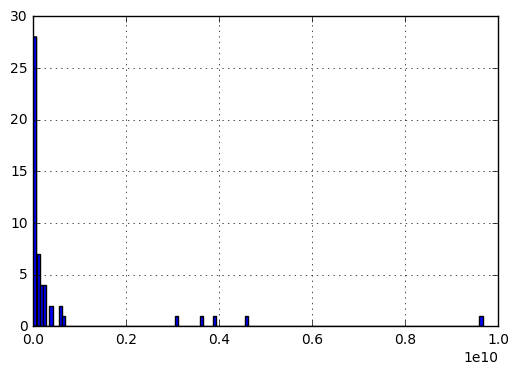

In [20]:
holding_2010["2010-REVENUE"].hist(bins=140)

In [21]:
supernovas_2010 = holding_2010[(holding_2010['2010-REVENUE'] > 2000000000)]
midmarket_2010 = holding_2010[\
    (holding_2010['2010-REVENUE'] <= 1999999999) & \
    (holding_2010['2010-REVENUE'] >= 500000000)]
burgeoning_2010 = holding_2010[\
    (holding_2010['2010-REVENUE'] <= 499999999) & \
    (holding_2010['2010-REVENUE'] >= 100000000)]
contenders_2010 = holding_2010[\
    (holding_2010['2010-REVENUE'] <= 99999999) & \
    (holding_2010['2010-REVENUE'] >= 25000000)]

In [22]:
supernovas_2011 = holding_2011[(holding_2011['2011-REVENUE'] > 2000000000)]
midmarket_2011 = holding_2011[\
    (holding_2011['2011-REVENUE'] <= 1999999999) & \
    (holding_2011['2011-REVENUE'] >= 500000000)]
burgeoning_2011 = holding_2011[\
    (holding_2011['2011-REVENUE'] <= 499999999) & \
    (holding_2011['2011-REVENUE'] >= 100000000)]
contenders_2011 = holding_2011[\
    (holding_2011['2011-REVENUE'] <= 99999999) & \
    (holding_2011['2011-REVENUE'] >= 25000000)]

In [23]:
supernovas_2012 = holding_2012[(holding_2012['2012-REVENUE'] > 2000000000)]
midmarket_2012 = holding_2012[\
    (holding_2012['2012-REVENUE'] <= 1999999999) & \
    (holding_2012['2012-REVENUE'] >= 500000000)]
burgeoning_2012 = holding_2012[\
    (holding_2012['2012-REVENUE'] <= 499999999) & \
    (holding_2012['2012-REVENUE'] >= 100000000)]
contenders_2012 = holding_2012[\
    (holding_2012['2012-REVENUE'] <= 99999999) & \
    (holding_2012['2012-REVENUE'] >= 25000000)]

In [24]:
supernovas_2013 = holding_2013[(holding_2013['2013-REVENUE'] > 2000000000)]
midmarket_2013 = holding_2013[\
    (holding_2013['2013-REVENUE'] <= 1999999999) & \
    (holding_2013['2013-REVENUE'] >= 500000000)]
burgeoning_2013 = holding_2013[\
    (holding_2013['2013-REVENUE'] <= 499999999) & \
    (holding_2013['2013-REVENUE'] >= 100000000)]
contenders_2013 = holding_2013[\
    (holding_2013['2013-REVENUE'] <= 99999999) & \
    (holding_2013['2013-REVENUE'] >= 25000000)]

In [25]:
supernovas_2014 = holding_2014[(holding_2014['2014-REVENUE'] > 2000000000)]
midmarket_2014 = holding_2014[\
    (holding_2014['2014-REVENUE'] <= 1999999999) & \
    (holding_2014['2014-REVENUE'] >= 500000000)]
burgeoning_2014 = holding_2014[\
    (holding_2014['2014-REVENUE'] <= 499999999) & \
    (holding_2014['2014-REVENUE'] >= 100000000)]
contenders_2014 = holding_2014[\
    (holding_2014['2014-REVENUE'] <= 99999999) & \
    (holding_2014['2014-REVENUE'] >= 25000000)]

In [26]:
supernovas_2015 = holding_2015[(holding_2015['2015-REVENUE'] > 2000000000)]
midmarket_2015 = holding_2015[\
    (holding_2015['2015-REVENUE'] <= 1999999999) & \
    (holding_2015['2015-REVENUE'] >= 500000000)]
burgeoning_2015 = holding_2015[\
    (holding_2015['2015-REVENUE'] <= 499999999) & \
    (holding_2015['2015-REVENUE'] >= 100000000)]
contenders_2015 = holding_2015[\
    (holding_2015['2015-REVENUE'] <= 99999999) & \
    (holding_2015['2015-REVENUE'] >= 25000000)]

In [31]:
supernovas_2010

,AGENCY-OWNER,adage2010_count,2010-REVENUE
27,Independent,634,9661156000
28,Interpublic,39,3606889000
38,Omnicom,63,4595246000
40,Publicis,39,3072242000
51,WPP,46,3927633000


In [32]:
supernovas_2015

,AGENCY-OWNER,adage2015_count,2015-REVENUE
4,Alliance Data Systems Corp.,2,2050465000
21,Independent,634,12696425000
22,Interpublic,43,4451749000
29,Omnicom,73,6777123000
31,Publicis,36,5186067000
35,WPP,43,5583747000


In [33]:
midmarket_2010

,AGENCY-OWNER,adage2010_count,2010-REVENUE
2,Alliance Data Systems Corp.,1,584400000
20,Havas,8,674687000
31,MDC Partners,19,590307000


In [34]:
midmarket_2015

,AGENCY-OWNER,adage2015_count,2015-REVENUE
0,Accenture,1,1231596000
9,DJE Holdings,2,558486000
10,Deloitte,1,865200000
11,Dentsu,13,942850000
16,Havas,5,859391000
19,IBM Corp.,1,796800000
24,MDC Partners,23,1028257000
32,PwC,1,624000000


In [29]:
burgeoning_2010

,AGENCY-OWNER,adage2010_count,2010-REVENUE
1,Aegis Group,5,189900000
8,D.L. Ryan Cos.,4,105848000
9,Daniel J. Edelman,3,361691000
10,Dentsu,5,230800000
15,GSI Commerce Inc.,1,162881000
16,Groupe Aeroplan,1,266251000
19,Harte-Hanks,1,138585000
23,Hearst Corp.,1,136100000
24,Huntsworth,2,105002000
25,IBM Corp.,1,233600000


In [30]:
contenders_2010

,AGENCY-OWNER,adage2010_count,2010-REVENUE
0,Ad Venture Interactive,1,68466000
3,Alloy Media & Marketing,1,39310000
13,FTI Consulting,1,77279000
21,Hawkeye Group,1,72570000
26,IMC2,1,48000000
30,LBi International,1,46000000
37,Next Fifteen Communications Group,2,25175000
44,RiverNorth Group,3,68661000
45,Ruder Finn Group,2,93182000
47,TMP Worldwide,1,69268000
